<a href="https://colab.research.google.com/github/Mehranmollanorozi/Kmeans/blob/main/Iris__kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
from sklearn.datasets import load_iris


In [ ]:
iris = load_iris()
X = iris.data
true_labels = iris.target


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


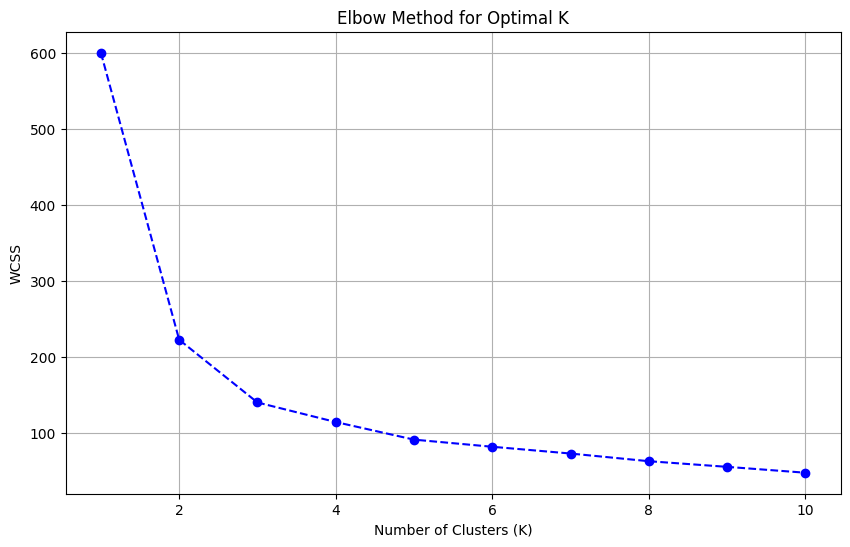

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
k = 3  # تعداد خوشه‌ها (بر اساس نمودار آرنج)
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
kmeans.fit(X_scaled)


KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
predicted_labels = kmeans.labels_

In [ ]:
sil_score = silhouette_score(X_scaled, predicted_labels)
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.46


In [ ]:
db_index = davies_bouldin_score(X_scaled, predicted_labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")

Davies-Bouldin Index: 0.83


In [ ]:
final_wcss = kmeans.inertia_
print(f"Final WCSS: {final_wcss:.2f}")

Final WCSS: 139.82


In [ ]:
confusion = confusion_matrix(true_labels, predicted_labels)
confusion

array([[ 0, 50,  0],
       [39,  0, 11],
       [14,  0, 36]])

In [ ]:
row_ind, col_ind = linear_sum_assignment(-confusion)
accuracy = confusion[row_ind, col_ind].sum() / len(true_labels)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.83


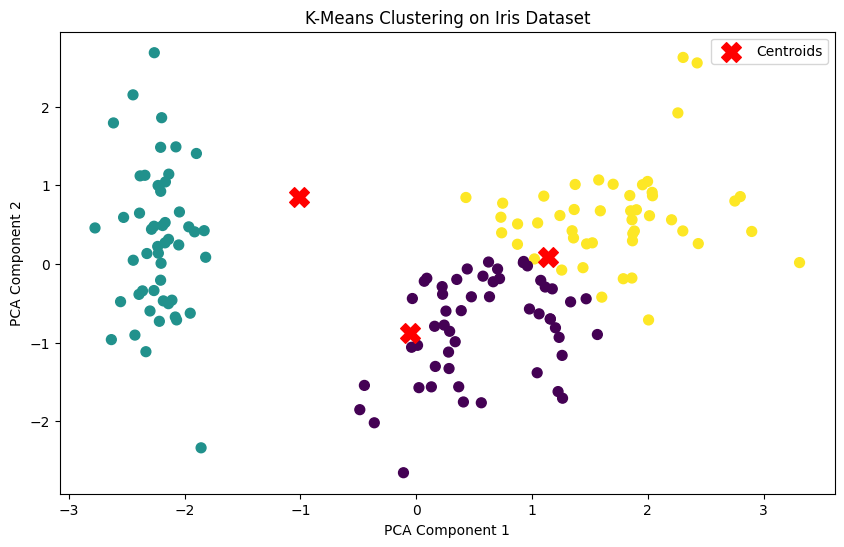

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# رسم نمودار خوشه‌ها
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()